In [1]:
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
from collections import Counter

In [2]:
'''
This function will run each individual trial.
'''
def runTrial(n):
    # Make an empty list and initialize the count
    sample_list = []
    count = 0

    # Keep looping until successful return call
    while(True):
        # generate random int between 0, n
        x = randint(0, n)
        
        # increment the count of randomly generated numbers
        count = count + 1
        
        # if x is already in sample list return the count
        if x in sample_list:
            return count
        # else add x to the list
        else:
            sample_list.append(x)
    return

In [3]:
'''
This function conducts the entire simulation.
'''
def birthdayParadox(n, m):
    # initialize an empty list
    full_list = []
    
    # run m individual trials and append results
    # to the full_list
    i = 0
    for i in range(m):
        full_list.append(runTrial(n))

    return full_list

In [4]:
'''
This function takes a list of values and derives the PDF.
The PDF is then returned in a dictionary structure.
'''
def probabilityDensityFunction(arg_list):
    # convert list to dictionary
    # with keys being the list elements
    # and values being the count of element appearnces in list
    result_count = Counter(result)
    
    # get the total number of observations
    total = sum(result_count.values(), 0.0)
    
    # divide each value in dictionary by total
    regularized_count = {k: v / total for k, v in result_count.items()}
    
    return regularized_count

In [5]:
'''
This function takes a PDF dictionary and returns
an ordered Pandas DataFrame with an additional 
column for cumulative probabilities.
'''
def cdfDataFrame(prob_dic):
    # converting the dicitonary to a 2 column numpy array
    df = np.array([[k,v] for k,v in prob_dic.items()])
    
    # sort the 2 column array for values in column 0
    df = df[df[:, 0].argsort()]
    
    # calculate the cumulative sum of the second column
    cdf = np.cumsum(df[:, 1])
    
    # now make a pandas dataframe
    data = pd.DataFrame({'Values': df[:, 0],
                         'Probability': df[:, 1],
                         'Cumulative Probability': cdf})
    
    return data

In [6]:
# run the entire simulation with specified arguments
result = birthdayParadox(n=5000, m=300)

In [7]:
# calculate the expected value
expected_v = sum(result) / len(result)
print("Expected value: ", expected_v)

Expected value:  88.08


In [8]:
# get the pdf
pdf = probabilityDensityFunction(result)

In [9]:
# get the cdf dataframe
cdf_df = cdfDataFrame(pdf)

In [10]:
# view the data
cdf_df

,Values,Probability,Cumulative Probability
0,8.0,0.003333,0.003333
1,13.0,0.003333,0.006667
2,14.0,0.003333,0.010000
3,17.0,0.010000,0.020000
4,19.0,0.006667,0.026667
...,...,...,...
129,196.0,0.006667,0.986667
130,212.0,0.003333,0.990000
131,219.0,0.003333,0.993333
132,234.0,0.003333,0.996667


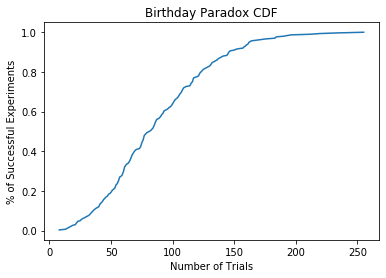

In [11]:
# generate a plot
plt.plot(cdf_df['Values'],
         cdf_df['Cumulative Probability'])

# adding some labels for clarity
plt.xlabel("Number of Trials")
plt.ylabel("% of Successful Experiments")
plt.title("Birthday Paradox CDF")

plt.show()

In [12]:
# compute simulation time
def timeSimulation(n, m, repitions):
    
    SETUP_CODE = '''
from __main__ import birthdayParadox
from random import randint'''
    
    TEST_CODE = '''
birthdayParadox(n = {}, m = {})'''.format(n, m)
    
    # running the code 100 times
    simulation_time = timeit.timeit(setup = SETUP_CODE,
                        stmt = TEST_CODE,
                        number = repitions)
    # taking average
    simulation_time = simulation_time / repitions
    
    return simulation_time

In [13]:
def runAllSimulations(number_of_trials, domain_size, scaler):
    # making the list to store the combination of results
    # each row will be an appended dictionary
    result_list = []
    
    # run all simulations
    for m in range(1, number_of_trials, 1 * scaler):
        for n in range(1, domain_size, 5 * scaler):
            t = timeSimulation(n, m, 1)
            tmp_dic = {'domain_size': n, 'number_of_trials': m, 'time':t}
            result_list.append(tmp_dic)
            
    # make the dataframe from list of dictionaries
    res_df = pd.DataFrame(result_list)
    return res_df

In [16]:
df = runAllSimulations(number_of_trials = 12000, domain_size = 1002000, scaler = 2000)

Text(0.5, 0.92, 'Simulation Time Surface')

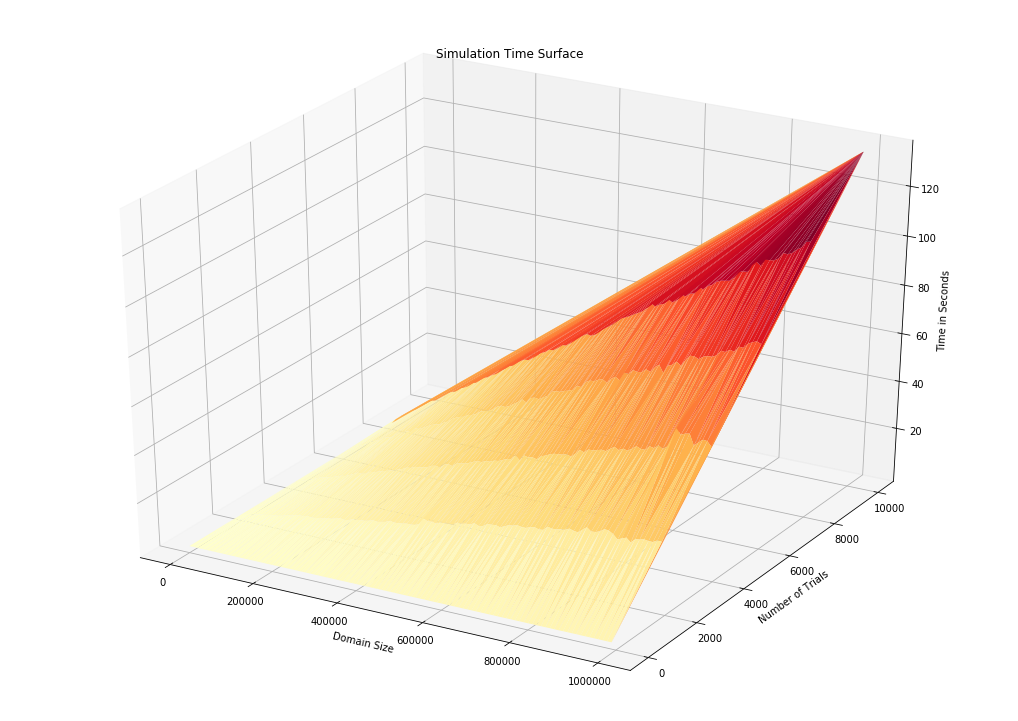

In [224]:
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure(figsize=(18, 13))
ax = plt.axes(projection = '3d')
x = df['domain_size'].to_numpy()
y = df['number_of_trials'].to_numpy()
z = df['time'].to_numpy()
ax.plot_trisurf(x, y, z,
                cmap = 'YlOrRd', edgecolor = 'none')
ax.set_xlabel("Domain Size")
ax.set_ylabel("Number of Trials")
ax.set_zlabel("Time in Seconds")
ax.set_title("Simulation Time Surface")